<a href="https://colab.research.google.com/github/santiagonajera/SQL_Python_Bases/blob/main/SQL_Python_Adventures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Clona el repositorio con los CSV de AdventureWorks
!git clone https://github.com/santiagonajera/SQL_Python_Bases.git

# Define la ruta a la carpeta 'Datos'
data_path = "/content/SQL_Python_Bases/Datos/"

Cloning into 'SQL_Python_Bases'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 759.39 KiB | 3.16 MiB/s, done.


In [16]:
import pandas as pd
import sqlite3

# Crear la base SQLite en memoria
conn = sqlite3.connect(":memory:")

# Ruta base
base_path = "/content/adventureworks-neo4j/data/"

# Tabla y nombre de archivo
tables = {
    "customers": "customers.csv",
    "employees": "employees.csv",
    "orders": "orders.csv",
    "productcategories": "productcategories.csv",
    "products": "products.csv",
    "productsubcategories": "productsubcategories.csv",
    "vendorproduct": "vendorproduct.csv",
    "vendors": "vendors.csv"
}

# Cargar todas las tablas
for table_name, file_name in tables.items():
    df = pd.read_csv(base_path + file_name, encoding='ISO-8859-1')
    df.to_sql(table_name, conn, index=False, if_exists="replace")

print("✅ Todas las tablas se han cargado correctamente.")


✅ Todas las tablas se han cargado correctamente.


In [17]:
query = """
SELECT
    *
FROM employees
LIMIT 2;
"""
pd.read_sql(query, conn)

,EmployeeID,ManagerID,FirstName,LastName,FullName,JobTitle,OrganizationLevel,MaritalStatus,Gender,Territory,Country,Group
0,274,NaN,Stephen,Jiang,Stephen Jiang,North American Sales Manager,2,M,M,None,None,None
1,275,274.0,Michael,Blythe,Michael Blythe,Sales Representative,3,S,M,Northeast,US,North America


In [18]:
query = """
SELECT
    *
FROM orders
LIMIT 2;
"""
pd.read_sql(query, conn)

,SalesOrderID,SalesOrderDetailID,OrderDate,DueDate,ShipDate,EmployeeID,CustomerID,SubTotal,TaxAmt,Freight,TotalDue,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,LineTotal
0,43659,1,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,776,1,2024.994,0.0,2024.994
1,43659,2,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,777,3,2024.994,0.0,6074.982


In [19]:
query = """
SELECT
    e.EmployeeID,
    e.FullName,
    SUM(o.LineTotal) AS TotalSales
FROM orders o
JOIN employees e ON o.EmployeeID = e.EmployeeID
GROUP BY e.EmployeeID, e.FullName
ORDER BY TotalSales DESC;
"""
pd.read_sql(query, conn)

,EmployeeID,FullName,TotalSales
0,276,Linda Mitchell,1.036701e+07
1,277,Jillian Carson,1.006580e+07
2,275,Michael Blythe,9.293903e+06
3,289,Jae Pak,8.503339e+06
4,279,Tsvi Reiter,7.171013e+06
5,281,Shu Ito,6.427006e+06
6,282,José Saraiva,5.926418e+06
7,290,Ranjit Varkey Chudukatil,4.509889e+06
8,283,David Campbell,3.729945e+06
9,278,Garrett Vargas,3.609447e+06


<ipython-input-20-957779351>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-20-957779351>:35: UserWarning: Glyph 129489 (\N{ADULT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-957779351>:35: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129489 (\N{ADULT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


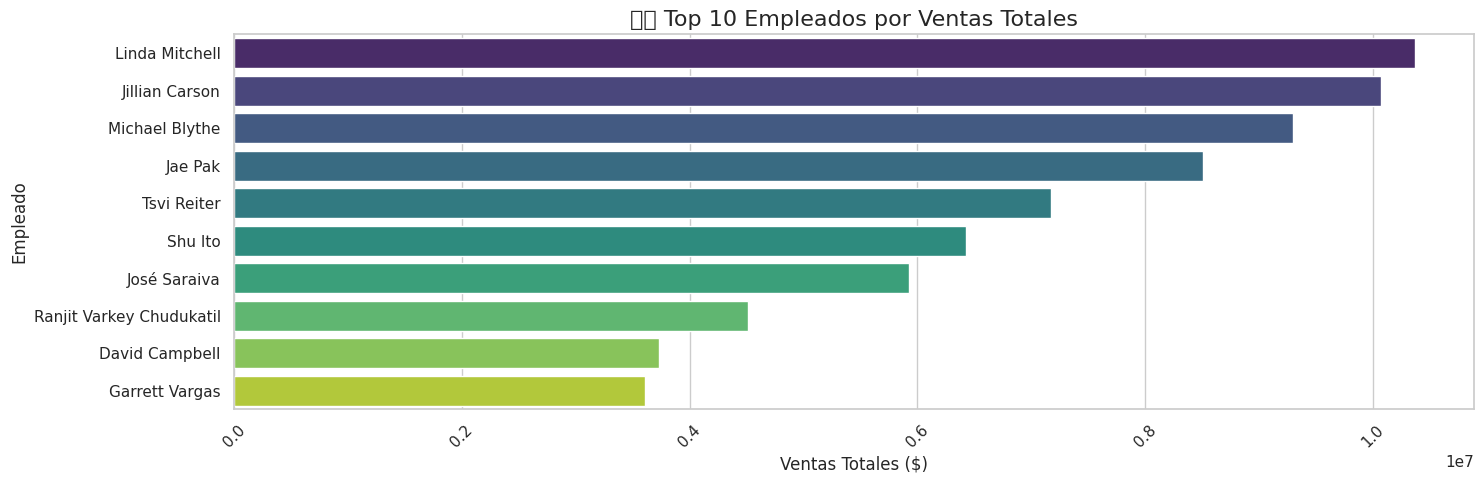

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ejecutar la consulta y obtener resultados
query = """
SELECT
    e.EmployeeID,
    e.FullName,
    SUM(o.LineTotal) AS TotalSales
FROM orders o
JOIN employees e ON o.EmployeeID = e.EmployeeID
GROUP BY e.EmployeeID, e.FullName
ORDER BY TotalSales DESC
LIMIT 10;
"""
df_sales_by_employee = pd.read_sql(query, conn)

# Estilo de gráfico
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")

# Gráfico de barras
sns.barplot(
    x="TotalSales",
    y="FullName",
    data=df_sales_by_employee,
    palette="viridis"
)

# Títulos y etiquetas
plt.title("🧑‍💼 Top 10 Empleados por Ventas Totales", fontsize=16)
plt.xlabel("Ventas Totales ($)", fontsize=12)
plt.ylabel("Empleado", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
